<a href="https://colab.research.google.com/github/chandadunani/IDS/blob/main/HW3/Project3_Key_chanda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project 3: Statistical Analysis on Factors Influencing Life Expectancy**

In [2]:
pip install mysql-connector-python

     |████████████████████████████████| 25.2 MB 1.3 MB/s 


In [3]:
import mysql.connector as sql

import pandas as pd
import pandas as pd
from tabulate import tabulate

In [4]:
# Connect to MySQL and execute a query

def execute_query(query):
   db_connection = sql.connect(host='208.109.18.154', database='ids7db', user='ids7', password='Btb2953')
   db_cursor = db_connection.cursor()
   db_cursor.execute(query)
   results = db_cursor.fetchall()

   return results


In [5]:
# Create a dataframe for the cleaned life expectancy dataset
# We are assuming all missing values were imputed in MySQL

# execute query and fetch results
results = execute_query('SELECT * FROM Life_Expectancy')

# create the dataframe
LifeExpectancyDF = pd.DataFrame(results)

# name the columns
LifeExpectancyDF.columns = ['Country', 'Year', 'Life_Expectancy','Adult_Mortality','Alcohol',
                            'Percentage_Expenditure','BMI','Total_Expenditure','GDP','Population','Schooling']

# print a few rows
LifeExpectancyDF.head()




,Country,Year,Life_Expectancy,Adult_Mortality,Alcohol,Percentage_Expenditure,BMI,Total_Expenditure,GDP,Population,Schooling
0,Afghanistan,2010,58.8,279,0.01,79.679367,16.7,9.20,553.328940,2883167,9.2
1,Afghanistan,2011,59.2,275,0.01,7.097109,17.2,7.87,63.537231,2978599,9.5
2,Afghanistan,2012,59.5,272,0.01,78.184215,17.6,8.52,669.959000,3696958,9.8
3,Afghanistan,2013,59.9,268,0.01,73.219243,18.1,8.13,631.744976,31731688,9.9
4,Afghanistan,2014,59.9,271,0.01,73.523582,18.6,8.18,612.696514,327582,10.0


# **Part I: MySQL (16 points)**

## **(1) Display total count of countries after data cleaning.**

In [6]:
# distinct number of countries

LifeExpectancyDF.Country.nunique()



193

In [7]:
# execute query and fetch results
num_countries = execute_query('SELECT count(distinct Country) FROM Life_Expectancy')

print(num_countries)



[(193,)]


## **(2) List of countries with the highest and lowest average mortality rates.**

* SELECT Country, avg(Adult_Mortality)
* from Life_Expectancy
* group by Country
* order by avg(Adult_Mortality) asc limit 1;

In [8]:
# execute query and fetch results
lowest = execute_query('SELECT Country, avg(Adult_Mortality) from Life_Expectancy group by Country order by avg(Adult_Mortality) asc limit 1')
highest = execute_query('SELECT Country, avg(Adult_Mortality) from Life_Expectancy group by Country order by avg(Adult_Mortality) desc limit 1')

print("Lowest average mortality rate: ", lowest)
print("Highest average mortality rate: ", highest)





Lowest average mortality rate:  [('Cook Islands', Decimal('0.0000'))]
Highest average mortality rate:  [('Lesotho', Decimal('436.0000'))]


**Extra credit: Pandas way to get min and max value**

In [9]:
dfMean = LifeExpectancyDF.groupby('Country').agg({'Adult_Mortality': ['mean']})

In [10]:
# max value
print(dfMean.idxmax(),dfMean.max(axis=0))

Adult_Mortality  mean    Lesotho
dtype: object Adult_Mortality  mean    436.0
dtype: float64


In [25]:
# min value
print(dfMean.idxmin(),dfMean.min(axis=0))

Adult_Mortality  mean    Cook Islands
dtype: object Adult_Mortality  mean    0.0
dtype: float64


## **(3) List of countries with the highest and lowest average population.** 

In [12]:
# execute query and fetch results
lowest = execute_query('SELECT Country, avg(Population) from Life_Expectancy group by Country order by avg(Population) asc limit 1')
highest = execute_query('SELECT Country, avg(Population) from Life_Expectancy group by Country order by avg(Population) desc limit 1')

print("Lowest average population rate: ", lowest)
print("Highest average population rate: ", highest)




Lowest average population rate:  [('Antigua and Barbuda', Decimal('0.0000'))]
Highest average population rate:  [('India', Decimal('281099848.5000'))]


## **(4) List of countries with the highest and lowest average GDP.**

In [13]:
# execute query and fetch results
lowest = execute_query('SELECT Country, avg(GDP) from Life_Expectancy group by Country order by avg(GDP) asc limit 1')
highest = execute_query('SELECT Country, avg(GDP) from Life_Expectancy group by Country order by avg(GDP) desc limit 1')

print("Lowest average GDP rate: ", lowest)
print("Highest average GDP rate: ", highest)



Lowest average GDP rate:  [('Bahamas', 0.0)]
Highest average GDP rate:  [('Switzerland', 70817.14495)]


## **(5) List of countries with the highest and lowest average Schooling.**


In [14]:
# execute query and fetch results
lowest = execute_query('SELECT Country, avg(Schooling) from Life_Expectancy group by Country order by avg(Schooling) asc limit 1')
highest = execute_query('SELECT Country, avg(Schooling) from Life_Expectancy group by Country order by avg(Schooling) desc limit 1')

print("Lowest average schooling rate: ", lowest)
print("Highest average schooling rate: ", highest)




Lowest average schooling rate:  [("CÃ´te d'Ivoire", 0.0)]
Highest average schooling rate:  [('Australia', 20.083333333333332)]


## **(6) Which countries have the highest and lowest average alcohol consumption?**

In [15]:
# execute query and fetch results
lowest = execute_query('SELECT Country, avg(alcohol) from Life_Expectancy group by Country order by avg(alcohol) asc limit 1')
highest = execute_query('SELECT Country, avg(alcohol) from Life_Expectancy group by Country order by avg(alcohol) desc limit 1')

print("Lowest average alcohol consumption rate: ", lowest)
print("Highest average alcohol consumption rate: ", highest)



Lowest average alcohol consumption rate:  [('Palau', 0.0)]
Highest average alcohol consumption rate:  [('Belarus', 12.783333333333333)]


## **(7) Do densely populated countries tend to have lower life expectancy?**

* As shown below, Sierra Leone with population of 1.7e+06 has LE of
expectancy ~50 while Germany has LE of almost 85 with a population of 1.79e+07


In [16]:
# execute query and fetch results
results1 = execute_query(' SELECT Country, avg(Population), avg(Life_Expectancy) ALE from Life_Expectancy group by Country ORDER BY ALE ASC limit 1')
results2 = execute_query(' SELECT Country, avg(Population), avg(Life_Expectancy) ALE from Life_Expectancy group by Country ORDER BY ALE DESC limit 1')

print(tabulate(results1))
print(tabulate(results2))




------------  -  -
Cook Islands  0  0
------------  -  -
-------  -----------  -------
Germany  1.79199e+07  84.6667
-------  -----------  -------


# **Part II: Python (24 Points)**

In [17]:
# summary of the attribues

LifeExpectancyDF.describe()




,Year,Life_Expectancy,Adult_Mortality,Alcohol,Percentage_Expenditure,BMI,Total_Expenditure,GDP,Population,Schooling
count,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1.108000e+03,1108.000000
mean,2012.504513,70.360740,151.537906,3.534486,775.580667,40.222022,5.117428,7434.287882,1.031508e+07,11.990072
std,1.701526,10.924028,108.801185,4.082022,2182.068813,21.313106,3.432399,15042.325206,4.745932e+07,4.121145
min,2010.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,2011.000000,64.700000,68.000000,0.010000,0.000000,22.100000,2.700000,339.308360,4.893500e+03,10.300000
50%,2013.000000,73.200000,137.500000,1.580000,67.769172,46.400000,5.370000,1627.230915,5.715680e+05,12.800000
75%,2014.000000,76.500000,218.250000,6.940000,520.363423,59.025000,7.392500,6427.509974,5.141898e+06,14.600000
max,2015.000000,89.000000,682.000000,17.310000,19479.911610,87.300000,17.600000,119172.741800,1.293859e+09,20.400000


### **Data Visualization**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f304c071750>,
      dtype=object)

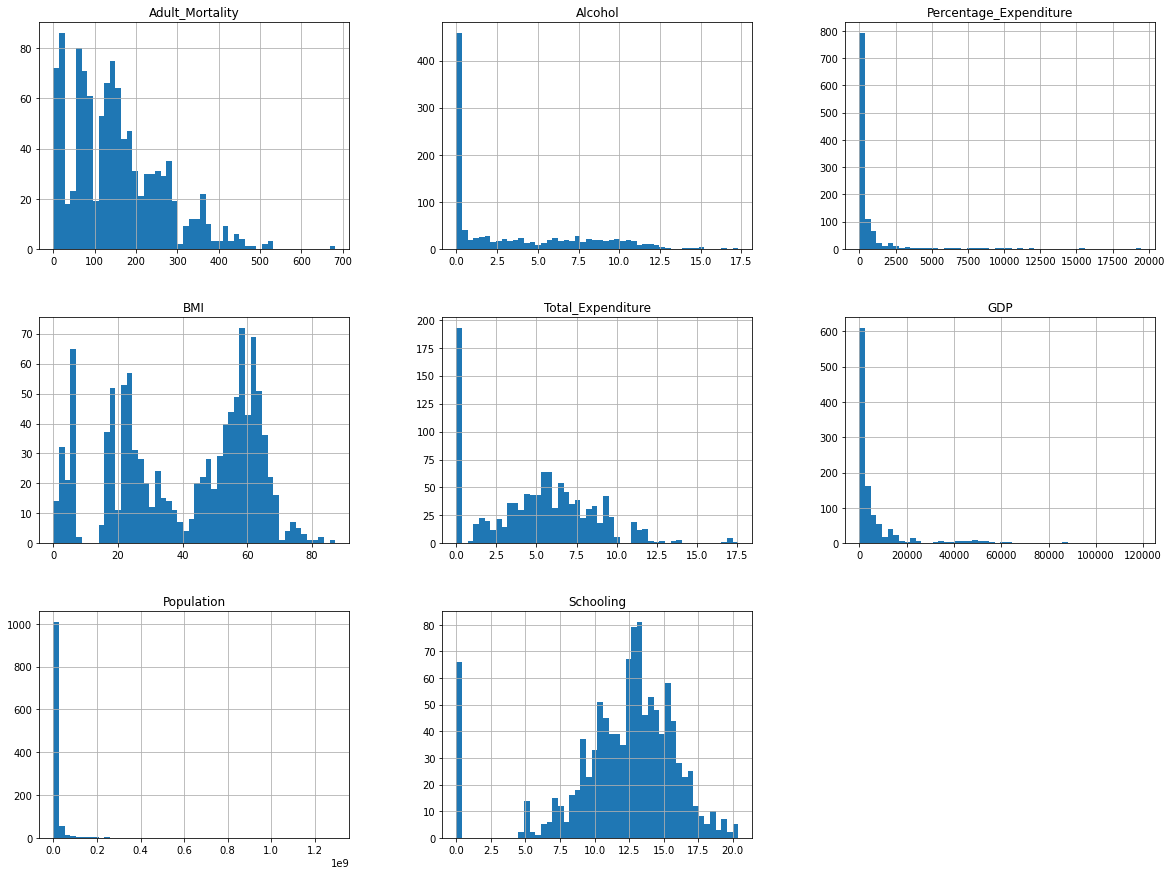

In [18]:
# histograms of numeric attributes

LifeExpectancyDF.hist(bins=50, figsize=(20,15), column=['Adult_Mortality', 'Alcohol', 'Percentage_Expenditure', 'BMI', 'Total_Expenditure', 'GDP', 'Population', 'Schooling'])



## **Pearson-r Correlations**



In [19]:
# Sort the values to see which attributes have strong and weak relationships with LE

corr_matrix = LifeExpectancyDF.corr()
corr_matrix['Life_Expectancy'].sort_values(ascending=False)




Life_Expectancy           1.000000
Schooling                 0.514715
BMI                       0.370011
GDP                       0.360691
Alcohol                   0.342385
Percentage_Expenditure    0.302691
Total_Expenditure         0.075930
Year                      0.030965
Population               -0.020249
Adult_Mortality          -0.510431
Name: Life_Expectancy, dtype: float64

### **Note**

* Schooling seems to be highly correlated with life expectancy
* BMI, GDP, GDP, Alcohol, etc. have a mild correlation with Life Expectancy
* Adult Mortality has a rather strong negative correlation with LE


In [20]:
# draw the heatmap of the correlation matrix

corr_matrix.style.background_gradient()





,Year,Life_Expectancy,Adult_Mortality,Alcohol,Percentage_Expenditure,BMI,Total_Expenditure,GDP,Population,Schooling
Year,1.000000,0.030965,-0.034312,-0.341582,-0.090909,0.059506,-0.408900,-0.009417,0.019337,0.033810
Life_Expectancy,0.030965,1.000000,-0.510431,0.342385,0.302691,0.370011,0.075930,0.360691,-0.020249,0.514715
Adult_Mortality,-0.034312,-0.510431,1.000000,-0.194368,-0.225325,-0.409431,-0.117131,-0.282571,0.036494,-0.384551
Alcohol,-0.341582,0.342385,-0.194368,1.000000,0.356469,0.228797,0.454184,0.283443,-0.015023,0.260280
Percentage_Expenditure,-0.090909,0.302691,-0.225325,0.356469,1.000000,0.188870,0.258133,0.856853,-0.018192,0.315875
BMI,0.059506,0.370011,-0.409431,0.228797,0.188870,1.000000,0.132539,0.245216,-0.072745,0.363704
Total_Expenditure,-0.408900,0.075930,-0.117131,0.454184,0.258133,0.132539,1.000000,0.123535,-0.028932,0.079496
GDP,-0.009417,0.360691,-0.282571,0.283443,0.856853,0.245216,0.123535,1.000000,-0.020904,0.386360
Population,0.019337,-0.020249,0.036494,-0.015023,-0.018192,-0.072745,-0.028932,-0.020904,1.000000,0.004196
Schooling,0.033810,0.514715,-0.384551,0.260280,0.315875,0.363704,0.079496,0.386360,0.004196,1.000000


## **Regression Models**

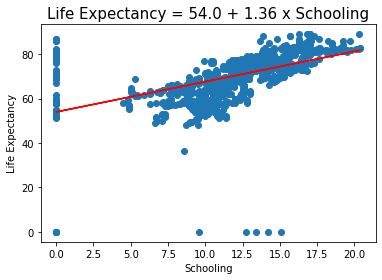

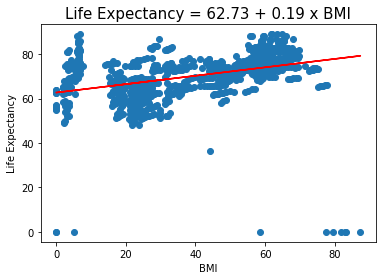

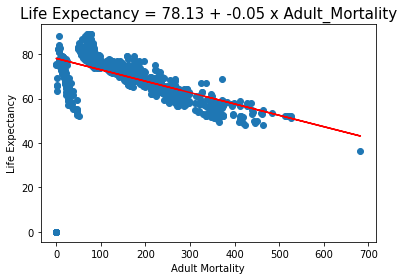

In [21]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

#######################################################
# Model 1: Life_Expectancy vs. Schooling
#######################################################
X1 = LifeExpectancyDF.loc[:, 'Schooling'].values.reshape(-1,1)
Y1 = LifeExpectancyDF.loc[:, 'Life_Expectancy'].values.reshape(-1,1)
LRmodel1 = LinearRegression()

# fit the model and make predictions
LRmodel1.fit(X1, Y1)
Y1_pred = LRmodel1.predict(X1)


#######################################################
# Model 2: Life_Expectancy vs. BMI
#######################################################
X2 = LifeExpectancyDF.loc[:, 'BMI'].values.reshape(-1,1)
LRmodel2 = LinearRegression()

# fit the model and make predictions
LRmodel2.fit(X2, Y1)
Y2_pred = LRmodel2.predict(X2)

#######################################################
# Model 3: Life_Expectancy vs. Adult Mortality
#######################################################
X3 = LifeExpectancyDF.loc[:, 'Adult_Mortality'].values.reshape(-1,1)
LRmodel3 = LinearRegression()

# fit the model and make predictions
LRmodel3.fit(X3, Y1)
Y3_pred = LRmodel3.predict(X3)


#######################################################
# plot all three regression models
#######################################################
plt.scatter(X1, Y1)
plt.plot(X1, Y1_pred, color='red')
plt.xlabel("Schooling")
plt.ylabel("Life Expectancy")
title1 = "Life Expectancy = " + str(round(LRmodel1.intercept_[0],2)) + " + " + str(round(LRmodel1.coef_[0][0],2)) + " x Schooling"
plt.title(title1, fontsize=15)
plt.show()



plt.scatter(X2, Y1)
plt.plot(X2, Y2_pred, color='red')
plt.xlabel("BMI")
plt.ylabel("Life Expectancy")
title1 = "Life Expectancy = " + str(round(LRmodel2.intercept_[0],2)) + " + " + str(round(LRmodel2.coef_[0][0],2)) + " x BMI"
plt.title(title1, fontsize=15)
plt.show()



plt.scatter(X3, Y1)
plt.plot(X3, Y3_pred, color='red')
plt.xlabel("Adult Mortality")
plt.ylabel("Life Expectancy")
title1 = "Life Expectancy = " + str(round(LRmodel3.intercept_[0],2)) + " + " + str(round(LRmodel3.coef_[0][0],2)) + " x Adult_Mortality"
plt.title(title1, fontsize=15)
plt.show()




## **Model Comparisons**
* Compute MSE values 
* Compute R2 scores
* Plot the results



In [22]:
# Summarize the findings for all models

from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# model 1 MSE and r2 values
m1_mse = mean_squared_error(Y1, Y1_pred)
m1_r2 = r2_score(Y1, Y1_pred)


# model 2 MSE and r2 values
m2_mse = mean_squared_error(Y1, Y2_pred)
m2_r2 = r2_score(Y1, Y2_pred)

# model 3 MSE and r2 values
m3_mse = mean_squared_error(Y1, Y3_pred)
m3_r2 = r2_score(Y1, Y3_pred)






### **Model R2 Values**


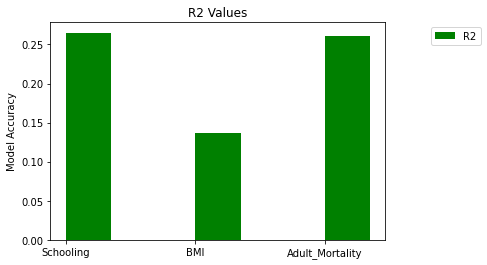

In [23]:
# prepare these for plotting

labels = ['Schooling', 'BMI', 'Adult_Mortality']
mse_values = [m1_mse, m2_mse, m3_mse]
r2_values =  [m1_r2,  m2_r2,  m3_r2]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x + width/2, r2_values, width, label='R2', color='green')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Model Accuracy')
ax.set_xticks(x)
#ax.set_ylim(0,1)
ax.set_xticklabels(labels)
ax.legend(bbox_to_anchor = (1.3, 1.0), loc='upper right')

plt.title('R2 Values')
plt.show()



### **Model MSE Values**

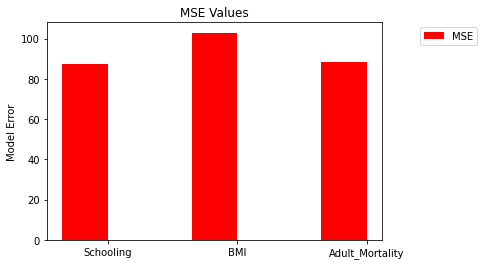

In [24]:
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, mse_values, width, label='MSE', color='red')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Model Error')
ax.set_xticks(x)
#ax.set_ylim(0,1)
ax.set_xticklabels(labels)
ax.legend(bbox_to_anchor = (1.3, 1.0), loc='upper right')

plt.title('MSE Values')
plt.show()




## **Regression Model Comparisons**

* Model 1 with **Schooling** has the largest R2 score and the lowest MSE value.
* Model 2 with **BMI** has the lowest R2 score and the highest MSE value.
* Models 1 and 3 make comparabale predictions.